# Supervised Learning Model of Spotify Dataset:
# Workout vs. Non-Workout Music

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [123]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [124]:

# Drop na values
df.dropna(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [125]:
# Feature selection
Features = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'tempo', 'acousticness']


In [126]:
X = df[Features] # this is the feature set that we will use to train the model

y = df['explicit'].astype(int) # this is the target variable that we want to predict 

track_names = df['track_name'] # this is the track name that we will use to identify the songs

In [127]:
# Split the dataset into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000) # Create a logistic regression model
model.fit(X_train, y_train) # Fit the model to the training data

LogisticRegression(max_iter=1000)

In [128]:
y_pred = model.predict(X_test) # Make predictions on the test data

In [129]:
print('Accuracy:', accuracy_score(y_test, y_pred)) # Print the accuracy of the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred)) # Print the confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred)) # Print the classification report

Accuracy: 0.9158333333333334
Confusion Matrix:
 [[20719   111]
 [ 1808   162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     20830
           1       0.59      0.08      0.14      1970

    accuracy                           0.92     22800
   macro avg       0.76      0.54      0.55     22800
weighted avg       0.89      0.92      0.89     22800



In [130]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

wrong = X_test[X_test['actual'] != X_test['predicted']]
print("Wrong Predictions: \n", wrong.head(5))# Print the first 10 wrong predictions

Wrong Predictions: 
         danceability  energy  loudness  speechiness  valence    tempo  \
102831         0.379   0.373   -12.176       0.0309    0.352  176.002   
60304          0.717   0.747    -4.561       0.0737    0.451   95.868   
60158          0.594   0.644    -7.458       0.3020    0.221  107.101   
109126         0.604   0.995    -3.641       0.1640    0.262  136.216   
65189          0.905   0.563    -6.135       0.1020    0.324  106.998   

        acousticness  actual  predicted  
102831       0.89500       1          0  
60304        0.11200       1          0  
60158        0.14100       1          0  
109126       0.00306       1          0  
65189        0.02540       1          0  


In [131]:
results = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred,
})

results = results.reset_index()

merged = pd.merge(results, df[['track_name', 'artists']], left_on='index', right_index=True)

wrong = merged[merged['actual'] != merged['predicted']]

wrong[['track_name', 'artists', 'actual', 'predicted']].head(10)

,track_name,artists,actual,predicted
14,NFWMB,Hozier,1,0
24,Amazing,Vybz Kartel;Dunw3ll;Stefflon Don,1,0
26,Crocodile Teeth,Skillibeng,1,0
28,Smack My Bitch Up,The Prodigy,1,0
43,First Class,Jack Harlow,1,0
52,Beat My Drum,Dither,0,1
57,Eat What You Kill,Confess,1,0
60,Se Menea,Don Omar;Nio Garcia,1,0
64,Folk Music,Billy Connolly,0,1
75,cold weather,glass beach,1,0


In [132]:
wrong.sort_values(by='predicted', ascending=False)

,index,actual,predicted,track_name,artists
11058,13471,0,1,Let Me Show You Love - Kevin McKay's Luv101 Edit,Romanthony;Kevin McKay
5976,36239,0,1,03h53 - Manger c'est tricher,Casseurs Flowters
4181,32067,0,1,Das main ki pyar wichon khatya (Sunno Flip),Ghauri;Lal Chand Yamla Jatt
18684,65230,0,1,Make It Right,BTS
18497,27661,0,1,INEEDU,Teddy Killerz
...,...,...,...,...,...
7429,64722,1,0,El Repaso,Brous One;Matiah Chinaski
7413,22585,1,0,Soil the Stillborn,Infant Annihilator
7397,33163,1,0,numb the pain,XXXTENTACION
7384,32459,1,0,Here Comes The Night,DJ Snake;Mr Hudson


In [107]:
merged['correct'] = merged['actual'] == merged['predicted']
merged['correct'] = merged['correct'].astype(int)

merged

,index,actual,predicted,track_name,artists,correct
0,7462,0,0,Listen To The Mockingbird,The Kentucky Colonels,1
1,87205,0,0,I Don't Like To Sleep Alone,Paul Anka;Odia Coates,1
2,68341,0,0,Pobre Diabla,Don Omar,1
3,57900,0,0,how deep?,Tai Verdes,1
4,45765,0,0,We Don't Talk About Bruno - Acoustic Instrumental,Guus Dielissen;Casper Esmann,1
...,...,...,...,...,...,...
22795,45192,0,0,Pes to gia mena (feat. Eleni Vitali),George Dalaras;Eleni Vitali,1
22796,68577,0,0,Boomerang,Lalo Ebratt;Trapical,1
22797,59628,0,0,Frozen Moment(Moment Gele) 1999-2000,Kiawasch Sahebnassagh,1
22798,75187,0,0,Making A Way,George Winston,1


In [112]:
merged[merged['correct'] == 1].sort_values(by='predicted', ascending=False)

,index,actual,predicted,track_name,artists,correct
2030,18492,1,1,Batman Cat,Kathleen Madigan,1
21514,60255,1,1,Winning Streak,Masicka,1
932,18388,1,1,It Was America: Rock And Roll Lecture,Tim Wilson,1
205,18961,1,1,Ketamine,Gary Gulman,1
21869,18793,1,1,Carlos - Live,Rodney Carrington,1
...,...,...,...,...,...,...
7639,81272,0,0,Mistletoe,Justin Bieber,1
7638,76761,0,0,Musica,Il Divo,1
7637,96584,0,0,Cadê Dalila - Ao Vivo Em São Paulo / 2018,Ivete Sangalo,1
7636,64431,0,0,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1


correct
1    20904
0     1896
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x2294cab1d00>,
 [Text(0, 0, 'Correct'), Text(1, 0, 'Incorrect')])

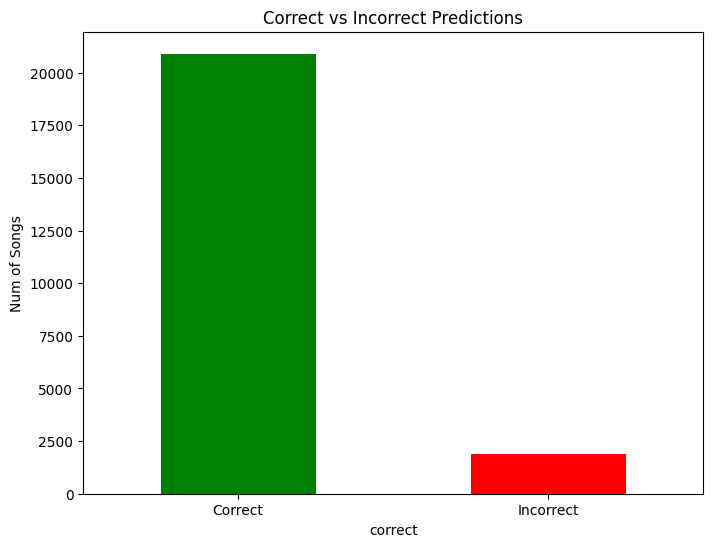

In [113]:

correct_cnt = merged['correct'].value_counts()
print(correct_cnt)
plt.figure(figsize=(8, 6))

correct_cnt.plot(kind='bar', color=['green', 'red'])
plt.ylabel("Num of Songs")
plt.title("Correct vs Incorrect Predictions")
plt.xticks([0, 1], ['Correct', 'Incorrect'], rotation=0)